In [1]:
install.packages('randomForest')
require(randomForest)
library(rpart)
library(purrr)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [2]:
sd = sample(1:10000,1)
print(sd)

set.seed(sd)

# Test Set
ta <- runif(100, min = 0, max = 1)
tb <- runif(100, min = 0, max = 1)
tc <- runif(100, min = 0, max = 1)

test <- data.frame(cbind(ta,tb,tc))
colnames(test) <- c('A','B', 'C')

# Train Set
a <- runif(10000, min = 0, max = 1)
b <- runif(10000, min = 0, max = 1)
c <- runif(10000, min = 0, max = 1)

train <- data.frame(cbind(a,b,c))
colnames(train) <- c('A','B', 'C')

train$I <- train$A + train$B + train$C

eq <- I~A+B+C

[1] 4002


In [3]:
set.seed(sd)
ntree = 50
model <- randomForest(eq,data=train,ntree=ntree,keep.inbag=T)

In [4]:
print(model)


Call:
 randomForest(formula = eq, data = train, ntree = ntree, keep.inbag = T) 
               Type of random forest: regression
                     Number of trees: 50
No. of variables tried at each split: 1

          Mean of squared residuals: 0.001606681
                    % Var explained: 99.35


In [5]:
## INBAG: n by ntree matrix be returned that keeps track of which samples are “in-bag” in which trees
## But not how many times, if sampling with replacement (Default replace = TRUE)
print(head(model$inbag)) ## 0 means OOB and 1-5 means which # of tree

  [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
1    0    1    1    1    3    0    2    0    1     0     1     3     1     0
2    0    2    1    1    2    2    2    1    1     0     1     0     2     1
3    0    3    0    0    0    1    0    2    0     0     2     3     0     1
4    2    1    0    3    0    2    1    0    0     1     0     1     0     0
5    1    3    3    1    3    1    0    1    0     2     1     1     1     1
6    1    3    0    0    1    1    1    2    2     0     2     0     2     2
  [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22] [,23] [,24] [,25] [,26] [,27]
1     0     2     2     1     2     2     2     3     1     1     0     0     2
2     1     1     0     0     0     1     0     1     1     3     0     0     0
3     0     2     1     0     0     0     1     2     0     2     0     2     1
4     0     0     0     2     1     0     0     0     4     3     0     1     0
5     1     0     1     1     0     0     0     1     1     0

In [6]:
outbag <- lapply(1:ntree, function(x) which(model[["inbag"]][ ,x] == 0)) ##keeping only the zeros

In [7]:
#print(outbag)

In [8]:
oobpred <- lapply(outbag, function(x) predict(model, train[x, ])) ## Out of bag predictions
#print(oobpred)

In [9]:
mae_function <- function(pred, actual) {
    mean(abs(pred-actual))
}

In [10]:
(oob_err <- map2_dbl(oobpred, outbag, function(x, y) mae_function(x, train[y, ]$I))) # Wi(obs) equation 5 Gajowniczek et.al (2020)
#print(oob_err) ## For each tree

[1] 0.01371994 0.01360849 0.01393356 0.01386155 0.01400286 0.01400642
 [7] 0.01355326 0.01394501 0.01393220 0.01370984 0.01385503 0.01389597
[13] 0.01393208 0.01376363 0.01365221 0.01396122 0.01406062 0.01392735
[19] 0.01378048 0.01364951 0.01401686 0.01367039 0.01399743 0.01381429
[25] 0.01386950 0.01385910 0.01377241 0.01388433 0.01381340 0.01386534
[31] 0.01397153 0.01403948 0.01387504 0.01367646 0.01381083 0.01381846
[37] 0.01402908 0.01408597 0.01370741 0.01382717 0.01386688 0.01398702
[43] 0.01417168 0.01398243 0.01380687 0.01347997 0.01387622 0.01401605
[49] 0.01393633 0.01433050

In [11]:
plot_function <- function(pred, actual) {
    plot(pred,actual)
    lines(actual,actual)
}

In [12]:
#plots <- map2(oobpred, outbag, function(x, y) plot_function(x, train[y, ]$I))
## You can see the pathology here as well
## Can you used to get correction - Work in Progress

In [13]:
## Predicting Test set responses
pred <- predict(model, test, type="response", predict.all=TRUE)
print(head(pred$individual)) #prediction from each tree ## pred$aggregate give simple average prediction 

      [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]      [,8]
1 1.369710 1.363172 1.186308 1.350108 1.173834 1.349623 1.338066 1.2680082
2 1.146753 1.242950 1.215109 1.170271 1.068249 1.301217 1.195291 1.8571712
3 1.291435 1.401021 1.355858 1.511122 1.571224 1.202238 1.264260 1.4776762
4 1.341463 1.220762 1.382982 1.368213 1.153942 1.272935 1.109833 1.6421408
5 1.671154 1.593246 1.538236 1.626533 1.431770 1.535361 1.580413 1.6643033
6 1.178334 1.048412 1.004908 1.192840 1.141218 1.100561 1.192168 0.9579558
       [,9]    [,10]    [,11]    [,12]    [,13]    [,14]    [,15]    [,16]
1 1.1201076 1.338904 1.217386 1.336487 1.329607 1.307860 1.393768 1.472550
2 1.0953150 1.058171 1.363849 1.218128 1.057307 1.040986 1.203340 1.432508
3 0.9431343 1.334390 1.275354 1.329798 1.456386 1.279702 1.260582 1.380929
4 1.2906339 1.358428 1.379626 1.337644 1.383151 1.397087 1.186307 1.245336
5 1.4751333 1.802987 1.561009 1.668915 1.644147 1.596780 1.567137 1.105890
6 1.0139228 1.275043 1.14

In [14]:
## If I rank the tree based on MAE of OOB error for each tree, then I can use equation 9 of Gajowniczek et.al (2020) to calculate weights
Rank <- as.vector(rank(oob_err))
Tree <- c(1:ntree)
rankorder <- as.data.frame(cbind(Tree,Rank))

In [15]:
rankorder$Nominator <- (ntree - rankorder$Rank + 1)^2 # equation 9
#print(rankorder)

In [16]:
sum = sum(rankorder$Nominator)
print(sum)

[1] 42925


In [17]:
normalize <- function(x) {
    return (3*((x - min(x)) / (max(x) - min(x))))
}

In [18]:
rankorder$TreeWts <- (rankorder$Nominator)/sum(rankorder$Nominator) # equation 9 and Table 3
rankorder$TreeWts <- normalize(rankorder$TreeWts)
print(rankorder)

   Tree Rank Nominator     TreeWts
1     1   10      1681 2.016806723
2     2    3      2304 2.764705882
3     3   33       324 0.387755102
4     4   22       841 1.008403361
5     5   41       100 0.118847539
6     6   42        81 0.096038415
7     7    2      2401 2.881152461
8     8   35       256 0.306122449
9     9   32       361 0.432172869
10   10    9      1764 2.116446579
11   11   20       961 1.152460984
12   12   29       484 0.579831933
13   13   31       400 0.478991597
14   14   11      1600 1.919567827
15   15    5      2116 2.539015606
16   16   36       225 0.268907563
17   17   47        16 0.018007203
18   18   30       441 0.528211285
19   19   13      1444 1.732292917
20   20    4      2209 2.650660264
21   21   44        49 0.057623049
22   22    6      2025 2.429771909
23   23   40       121 0.144057623
24   24   17      1156 1.386554622
25   25   25       676 0.810324130
26   26   21       900 1.079231693
27   27   12      1521 1.824729892
28   28   28       5

In [19]:
print(pred$individual[1,])

 [1] 1.369710 1.363172 1.186308 1.350108 1.173834 1.349623 1.338066 1.268008
 [9] 1.120108 1.338904 1.217386 1.336487 1.329607 1.307860 1.393768 1.472550
[17] 1.407973 1.183204 1.333729 1.334426 1.336348 1.392953 1.362904 1.254520
[25] 1.365358 1.327151 1.267568 1.310220 1.342395 1.433831 1.293435 1.299332
[33] 1.369710 1.365358 1.349760 1.398978 1.369710 1.411020 1.375094 1.207263
[41] 2.522368 1.324679 1.342395 1.338445 1.351441 1.306051 1.469896 1.277941
[49] 1.359803 1.342395


In [20]:
predictions <- vector()
for (i in 1:100){
    wtpredsum = 0
    for (k in 1:ntree){
        wtpred <- pred$individual[i,k] * rankorder$TreeWts[k]
        wtpredsum = wtpredsum + wtpred
    }
    predictions[i] <- wtpredsum/ntree ## equation 3
}

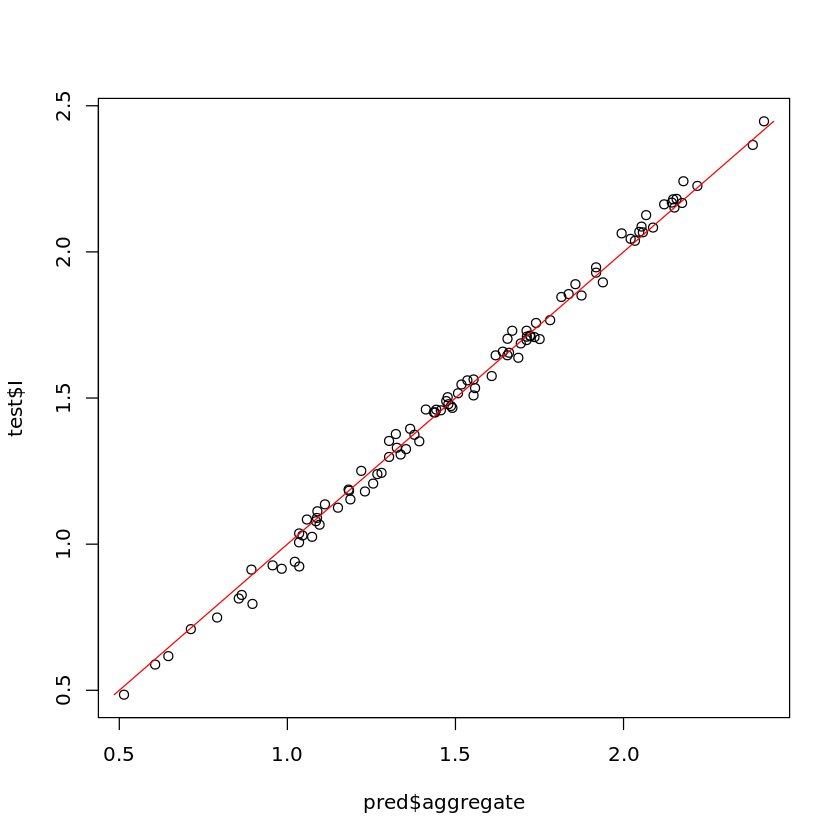

In [21]:
test$I <- test$A + test$B + test$C
plot(pred$aggregate,test$I)
lines(test$I,test$I, col= "red")

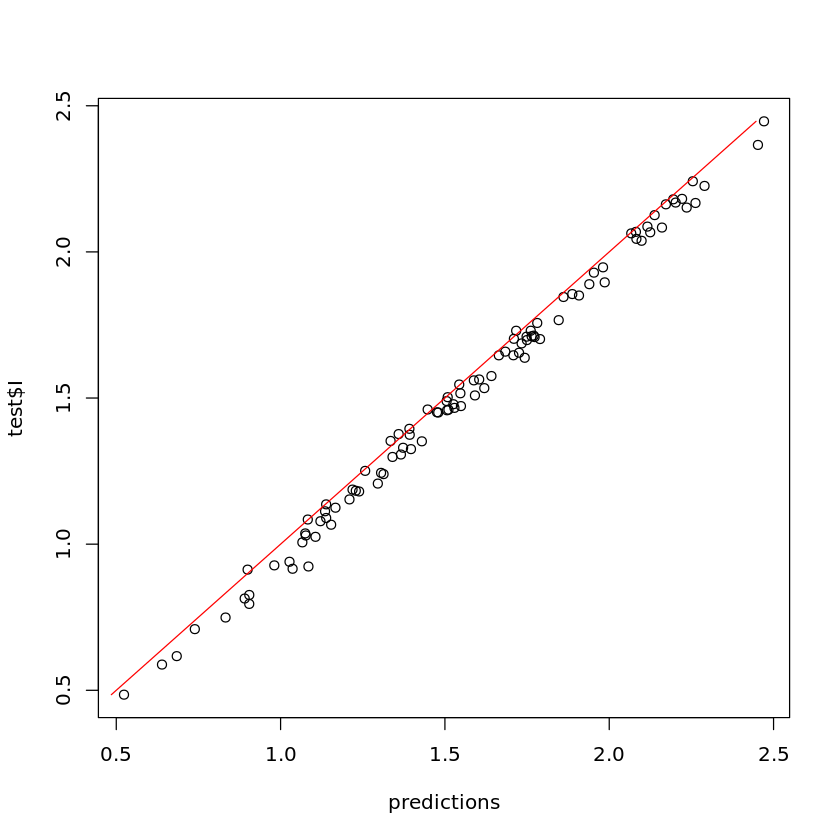

In [22]:
plot(predictions,test$I)
lines(test$I,test$I, col= "red")

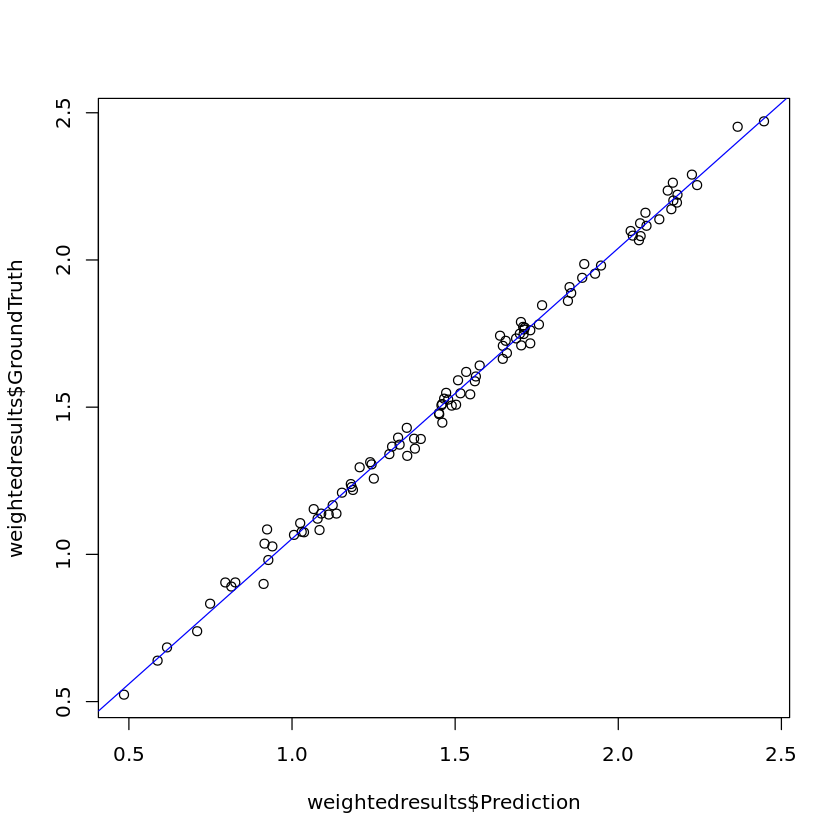

In [23]:
## Plotting with regression line (in red) instead
weightedresults<-as.data.frame(cbind(predictions,test$I))
colnames(weightedresults)<- c("GroundTruth", "Prediction")
reg1 <- lm(GroundTruth~Prediction, data=weightedresults)
plot(weightedresults$Prediction,weightedresults$GroundTruth)
abline(reg1, col="blue")

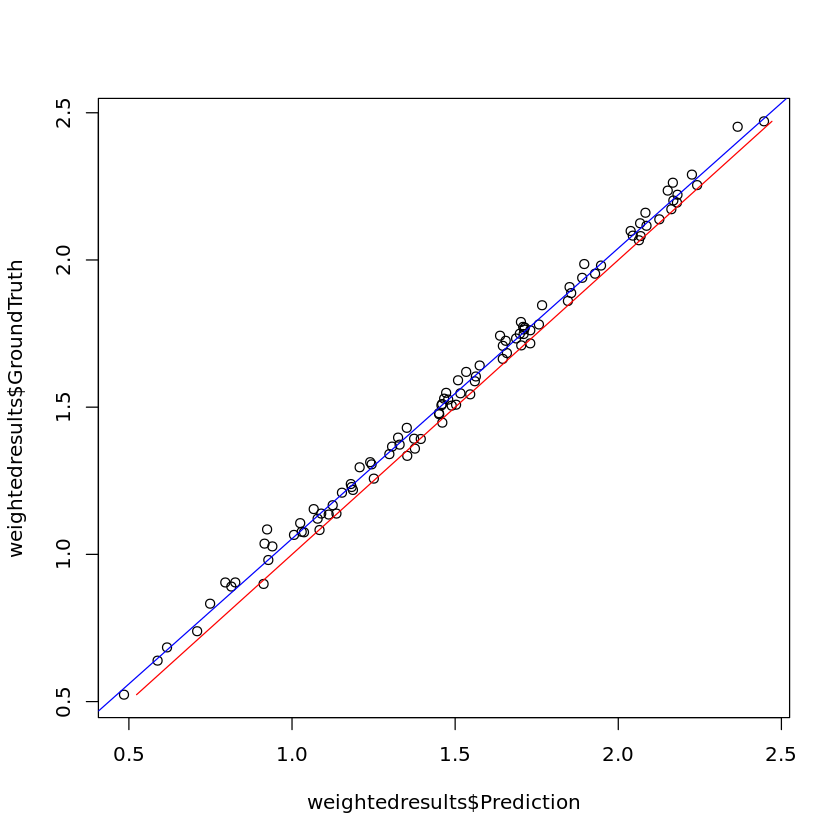

In [24]:
plot(weightedresults$Prediction,weightedresults$GroundTruth)
abline(reg1, col="blue")
lines(weightedresults$GroundTruth,weightedresults$GroundTruth, col= "red")